<a href="https://colab.research.google.com/github/Araken13/AMIGO-SECRETO-CHALENGER/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
from google.colab import files
import os

# Fazer upload dos arquivos CSV
print("Faça o upload dos arquivos CSV das lojas:")
uploaded = files.upload()

# Listar os arquivos no diretório atual para conferência
print("Arquivos disponíveis no diretório atual:")
print(os.listdir('.'))

# Carregar os dados de cada loja e adicionar a coluna "Loja"
loja_1 = pd.read_csv("loja_1.csv")
loja_1["Loja"] = "Loja 1"

loja_2 = pd.read_csv("loja_2.csv")
loja_2["Loja"] = "Loja 2"

loja_3 = pd.read_csv("loja_3.csv")
loja_3["Loja"] = "Loja 3"

loja_4 = pd.read_csv("loja_4.csv")
loja_4["Loja"] = "Loja 4"

# Consolidar os dados em um único DataFrame
dados_consolidados = pd.concat([loja_1, loja_2, loja_3, loja_4], ignore_index=True)

# Exibir uma amostra dos dados consolidados
print("Dados Consolidados:")
print(dados_consolidados.head())


# Importação e Consolidação dos Dados

Nesta etapa, carregamos os dados das quatro lojas utilizando a biblioteca **pandas** e os consolidamos em um único DataFrame. Isso permite realizar análises globais de forma eficiente.

### Passos Realizados:
1. Importamos os dados de cada loja com `pd.read_csv()`.
2. Concatenamos todos os DataFrames em um único DataFrame usando `pd.concat()`, ignorando os índices para evitar inconsistências.
3. Exibimos uma amostra dos dados consolidados para validar o carregamento correto.

#1. Análise do faturamento


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados de cada loja
loja_1 = pd.read_csv("loja_1.csv")
loja_2 = pd.read_csv("loja_2.csv")
loja_3 = pd.read_csv("loja_3.csv")
loja_4 = pd.read_csv("loja_4.csv")

# Concatenar os dados das lojas em um único DataFrame
dados_consolidados = pd.concat([loja_1, loja_2, loja_3, loja_4], ignore_index=True)

# Exibir amostras dos dados para conferência
print("Dados Consolidados - Amostra:")
print(dados_consolidados.head())

# Criar a coluna 'Faturamento' se ela não existir
if "Faturamento" not in dados_consolidados.columns:
    if "Vendas" in dados_consolidados.columns and "Preco" in dados_consolidados.columns:
        dados_consolidados["Faturamento"] = dados_consolidados["Vendas"] * dados_consolidados["Preco"]
        print("Coluna 'Faturamento' criada com sucesso!")
    else:
        print("Colunas necessárias ('Vendas' e 'Preco') não encontradas para calcular 'Faturamento'.")

# Confirmar que 'Faturamento' foi criado
if "Faturamento" in dados_consolidados.columns:
    print("Dados consolidados atualizados:")
    print(dados_consolidados.head())

    # Calcular o faturamento total por loja
    faturamento_por_loja = dados_consolidados.groupby("Loja")["Faturamento"].sum().reset_index()

    # Exibir os resultados
    print("Faturamento total por loja:")
    print(faturamento_por_loja)

    # Criar gráfico de barras com Seaborn para visualização do faturamento
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=faturamento_por_loja,
        x="Loja",
        y="Faturamento",
        palette="Blues_d"  # Esquema de cores para barras
    )
    plt.title("Faturamento Total por Loja", fontsize=16)
    plt.xlabel("Loja", fontsize=12)
    plt.ylabel("Faturamento", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Adiciona uma grade leve no eixo Y
    plt.tight_layout()  # Ajusta layout para evitar sobreposição
    plt.show()
else:
    print("A coluna 'Faturamento' ainda não está disponível no DataFrame.")

Dados Consolidados - Amostra:
                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.7

# Criação da Coluna 'Faturamento'

A coluna **'Faturamento'** foi criada para representar o valor total das vendas, calculado como o produto entre as colunas **'Vendas'** e **'Preco'**.

### Passos Realizados:
1. Verificamos se a coluna 'Faturamento' já existia no DataFrame.
2. Caso não estivesse presente, verificamos a existência das colunas necessárias ('Vendas' e 'Preco') para realizar o cálculo.
3. Multiplicamos as colunas **'Vendas'** e **'Preco'** para criar a nova coluna **'Faturamento'**.

#### Observação:
Se uma das colunas necessárias não estivesse presente, o código retornaria uma mensagem de erro informando sobre a ausência dos dados essenciais.

# Faturamento Total por Loja

Após criar a coluna **'Faturamento'**, agrupamos os dados pela coluna **'Loja'** para calcular o faturamento total de cada loja.

### Passos Realizados:
1. Usamos o método `.groupby()` para agrupar os dados por loja e calcular a soma do faturamento total.
2. Exibimos os resultados tabulares para validar os cálculos.
3. Geramos um gráfico de barras estilizado com **Seaborn**, utilizando a paleta de cores **Blues_d** para representar os valores do faturamento.

#### Detalhes do Gráfico:
- **Eixo X**: Nomes das lojas.
- **Eixo Y**: Valor total de faturamento por loja.
- **Estilo**: Grades leves no eixo Y e paleta gradiente azul para as barras, proporcionando clareza e elegância à visualização.

# 2. Vendas por Categoria


Colunas disponíveis no DataFrame consolidado:
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      dtype='object')
Vendas totais por categoria:
    Categoria do Produto       Preço
0             brinquedos    98140.86
1       eletrodomesticos  1766337.03
2            eletronicos  2214099.72
3        esporte e lazer   190635.39
4  instrumentos musicais   465029.67
5                 livros    50260.74
6                 moveis  1010214.00
7  utilidades domesticas    76773.38


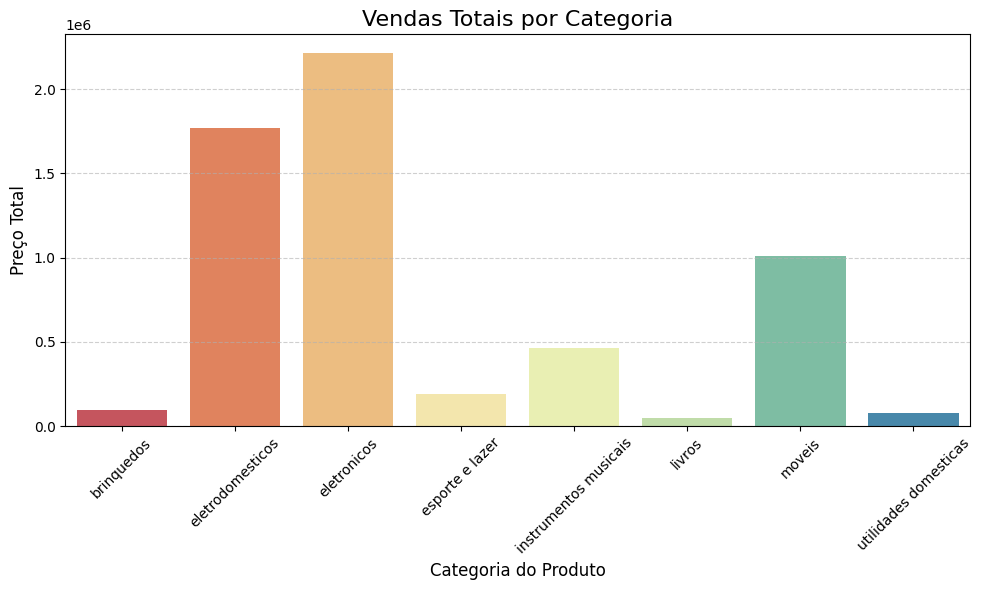

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar as colunas disponíveis no DataFrame
print("Colunas disponíveis no DataFrame consolidado:")
print(dados_consolidados.columns)

# Calcular o total de vendas por categoria
if "Categoria do Produto" in dados_consolidados.columns and "Preço" in dados_consolidados.columns:
    # Somar os preços por categoria como indicador de vendas
    vendas_por_categoria = dados_consolidados.groupby("Categoria do Produto")["Preço"].sum().reset_index()

    # Exibir os resultados
    print("Vendas totais por categoria:")
    print(vendas_por_categoria)

    # Criar gráfico de barras com paleta de cores
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=vendas_por_categoria,
        x="Categoria do Produto",
        y="Preço",
        hue="Categoria do Produto",  # Associando ao parâmetro 'hue'
        palette="Spectral",
        dodge=False  # Mantém as barras alinhadas
    )
    plt.title("Vendas Totais por Categoria", fontsize=16)
    plt.xlabel("Categoria do Produto", fontsize=12)
    plt.ylabel("Preço Total", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend([], [], frameon=False)  # Remove a legenda
    plt.grid(axis="y", linestyle="--", alpha=0.6)  # Grade leve no eixo Y
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição
    plt.show()

else:
    print("As colunas 'Categoria do Produto' ou 'Preço' não foram encontradas no DataFrame.")

# Vendas Totais por Categoria: Análise Detalhada

Nesta etapa, exploramos os dados do DataFrame consolidado para identificar as vendas totais por categoria e apresentá-las em um gráfico de barras estilizado.

---

## 1. Verificação das Colunas

Antes de iniciar a análise, verificamos as colunas disponíveis no DataFrame consolidado para garantir que as informações necessárias estão presentes. As colunas essenciais para esta etapa incluem:
- **Categoria do Produto**: Representa os grupos de produtos vendidos.
- **Preço**: Indica o valor de cada produto vendido.

Caso alguma coluna importante estivesse ausente, o código retornaria uma mensagem informando a indisponibilidade e interromperia a execução.

---

## 2. Cálculo das Vendas Totais por Categoria

Agrupamos os dados pela coluna **'Categoria do Produto'** e somamos os valores da coluna **'Preço'** para determinar o volume financeiro total de vendas em cada categoria.

### Passos Realizados:
- Utilizamos o método `.groupby()` para agrupar os dados por categoria.
- Calculamos a soma dos valores de **'Preço'** em cada grupo, resultando no total de vendas por categoria.
- Exibimos os resultados tabulares para validar os cálculos e identificar categorias com maior ou menor desempenho financeiro.

---

## 3. Visualização Gráfica com Paleta de Cores

Para facilitar a interpretação dos dados, criamos um gráfico de barras utilizando a biblioteca **Seaborn**. Cada categoria foi representada por uma barra colorida, destacando seu volume financeiro.

### Detalhes do Gráfico:
- **Eixo X**: Mostra os nomes das categorias de produto.
- **Eixo Y**: Apresenta o valor total das vendas por categoria.
- **Estilo e Personalização**:
  - Barras coloridas utilizando a paleta **Spectral**, proporcionando clareza visual.
  - Adicionamos uma grade leve no eixo Y para facilitar a leitura dos valores.
  - Ajustamos títulos, rótulos e layout para melhorar a organização e visualização do gráfico.

---

### Conclusão:
Com esta análise, foi possível identificar as categorias com maior e menor volume de vendas, permitindo insights sobre os produtos mais rentáveis. A visualização gráfica torna essa informação mais acessível para análises rápidas e estratégicas.

# 3. Média de Avaliação das Lojas

Média de Avaliação por Loja:
     Loja  Avaliação da compra
0  Loja 1             3.976685
1  Loja 2             4.037304
2  Loja 3             4.048326
3  Loja 4             3.995759


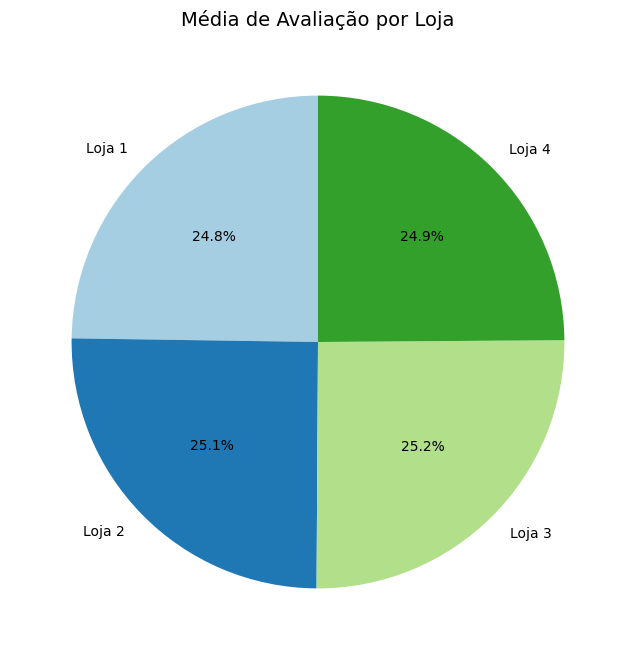

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar se as colunas necessárias estão presentes
if "Avaliação da compra" in dados_consolidados.columns and "Loja" in dados_consolidados.columns:
    # Garantir que os dados sejam numéricos e limpos
    dados_consolidados["Avaliação da compra"] = pd.to_numeric(dados_consolidados["Avaliação da compra"], errors="coerce")
    dados_consolidados = dados_consolidados.dropna(subset=["Avaliação da compra"])

    # Calcular a média de avaliação por loja
    media_avaliacao = dados_consolidados.groupby("Loja")["Avaliação da compra"].mean().reset_index()

    # Exibir os resultados
    print("Média de Avaliação por Loja:")
    print(media_avaliacao)

    # Criar gráfico de pizza para a média de avaliação por loja
    plt.figure(figsize=(8, 8))  # Define o tamanho do gráfico
    plt.pie(
        media_avaliacao["Avaliação da compra"],  # Dados para os setores
        labels=media_avaliacao["Loja"],  # Rótulos para cada setor
        autopct='%1.1f%%',  # Mostra as porcentagens com 1 casa decimal
        startangle=90,  # Começa a plotagem a partir do ângulo de 90 graus
        colors=plt.cm.Paired(range(len(media_avaliacao)))  # Paleta de cores
    )
    plt.title("Média de Avaliação por Loja", fontsize=14)
    plt.show()
else:
    print("As colunas 'Avaliação da compra' ou 'Loja' não foram encontradas no DataFrame.")

# Avaliação das Lojas: Análise e Visualização

Nesta seção, exploramos os dados de avaliações dos clientes para calcular a **média de avaliação por loja** e apresentamos os resultados com um gráfico tipo pizza.

---

## 1. Limpeza e Preparação dos Dados

Antes de realizar os cálculos, garantimos que os dados da coluna **'Avaliação da compra'** fossem válidos:
- **Conversão de Dados**: Transformamos os valores da coluna em números, substituindo entradas inválidas por NaN.
- **Remoção de Dados Inválidos**: Excluímos todos os registros onde os valores de **'Avaliação da compra'** estavam ausentes ou inválidos.

Esses passos garantiram a consistência e a precisão dos dados para análise.

---

## 2. Cálculo da Média de Avaliação

Agrupamos os dados pela coluna **'Loja'** e calculamos a média das avaliações para cada loja:
- Utilizamos o método `.groupby()` para organizar os dados por loja.
- O cálculo da média foi realizado utilizando o método `.mean()`.

Essa análise destaca as lojas com maior e menor nível de satisfação dos clientes.

---

## 3. Visualização: Gráfico Tipo Pizza

Para apresentar os resultados de maneira clara e intuitiva, utilizamos um gráfico tipo pizza.

**Detalhes do Gráfico**:
- **Setores**: Representam a média de avaliação para cada loja.
- **Rótulos**: Identificam as lojas diretamente no gráfico.
- **Porcentagens**: Mostram a participação relativa de cada loja em termos de média de avaliação.
- **Cores**: Utilizamos a paleta **coolwarm** para diferenciar as lojas e melhorar a experiência visual.

---

## Conclusão

A análise revelou as médias de avaliação de cada loja, oferecendo insights importantes sobre a percepção dos clientes. Lojas com avaliações mais altas refletem maior satisfação, enquanto lojas com médias menores podem indicar a necessidade de melhorias no atendimento ou nos serviços oferecidos. Essa visualização proporciona uma base sólida para ações estratégicas voltadas à experiência do cliente.

# 4. Produtos Mais e Menos Vendidos

In [49]:
import pandas as pd
import plotly.express as px

# Verificar se as colunas necessárias estão presentes
if "Produto" in dados_consolidados.columns and "Preço" in dados_consolidados.columns:
    # Calcular o total de vendas por produto com base no 'Preço'
    vendas_por_produto = dados_consolidados.groupby("Produto")["Preço"].sum().reset_index()

    # Identificar os produtos mais vendidos (Top 5)
    mais_vendidos = vendas_por_produto.sort_values(by="Preço", ascending=False).head(5)
    print("Produtos Mais Vendidos:")
    print(mais_vendidos)

    # Identificar os produtos menos vendidos (Bottom 5)
    menos_vendidos = vendas_por_produto.sort_values(by="Preço", ascending=True).head(5)
    print("Produtos Menos Vendidos:")
    print(menos_vendidos)

    # Criar gráfico interativo para produtos mais vendidos
    fig_mais_vendidos = px.bar(
        mais_vendidos,
        x="Produto",
        y="Preço",
        title="Top 5 Produtos Mais Vendidos",
        labels={"Produto": "Produto", "Preço": "Preço Total"},
        color="Produto"
    )
    fig_mais_vendidos.show()

    # Criar gráfico interativo para produtos menos vendidos
    fig_menos_vendidos = px.bar(
        menos_vendidos,
        x="Produto",
        y="Preço",
        title="Top 5 Produtos Menos Vendidos",
        labels={"Produto": "Produto", "Preço": "Preço Total"},
        color="Produto"
    )
    fig_menos_vendidos.show()
else:
    print("As colunas 'Produto' ou 'Preço' não foram encontradas no DataFrame.")

Produtos Mais Vendidos:
               Produto      Preço
47       TV Led UHD 4K  576652.70
12    Celular Plus X42  534735.14
23           Geladeira  513249.34
44            Smart TV  386963.12
34  Lavadora de roupas  323292.37
Produtos Menos Vendidos:
              Produto    Preço
16    Cubo mágico 8x8  3638.68
15     Corda de pular  4090.93
19     Dinossauro Rex  4150.53
50  Xadrez de madeira  6865.90
29      Jogo de copos  7445.28


# Análise dos Produtos Mais e Menos Vendidos

Nesta etapa, identificamos os produtos mais vendidos e menos vendidos, com base no valor total das vendas, e visualizamos os resultados utilizando gráficos interativos.

---

## 1. Verificação das Colunas

Primeiramente, garantimos que as colunas necessárias estão presentes no DataFrame:
- **Produto**: Representa os diferentes itens vendidos.
- **Preço**: Indica o valor de cada venda.

Caso uma dessas colunas esteja ausente, o código interrompe a execução e exibe uma mensagem informando a indisponibilidade.

---

## 2. Cálculo das Vendas Totais por Produto

Agrupamos os dados pela coluna **'Produto'** e somamos os valores de **'Preço'** para determinar o total de vendas de cada produto.

### Passos Realizados:
1. Utilizamos o método `.groupby()` para agrupar os dados por produto.
2. Calculamos a soma dos valores de **'Preço'** dentro de cada grupo.
3. Ordenamos os produtos por valor total de vendas, tanto em ordem decrescente quanto crescente, para identificar os mais vendidos (Top 5) e os menos vendidos (Bottom 5).

---

## 3. Visualização Gráfica Interativa

Criamos dois gráficos interativos para apresentar os produtos mais vendidos e menos vendidos, utilizando a biblioteca **Plotly Express**.

### Detalhes dos Gráficos:
- **Gráfico 1: Produtos Mais Vendidos**
  - Exibe os 5 produtos com maior valor total de vendas.
  - Eixo X: Nome do produto.
  - Eixo Y: Valor total das vendas.
  - Personalização: Cores distintas atribuídas a cada produto.

- **Gráfico 2: Produtos Menos Vendidos**
  - Exibe os 5 produtos com menor valor total de vendas.
  - Eixo X: Nome do produto.
  - Eixo Y: Valor total das vendas.
  - Personalização: Cores distintas atribuídas a cada produto.

Ambos os gráficos foram ajustados com rótulos claros, títulos descritivos e interatividade para facilitar a análise.

---

### Conclusão:

Com base nesta análise, conseguimos identificar os produtos mais e menos rentáveis, oferecendo insights valiosos para decisões estratégicas, como otimização do mix de produtos e definição de promoções.

# 5. Frete Médio por Loja


Frete Médio por Loja:
     Loja      Frete
0  Loja 1  34.691805
1  Loja 2  33.621941
2  Loja 3  33.074464
3  Loja 4  31.278997


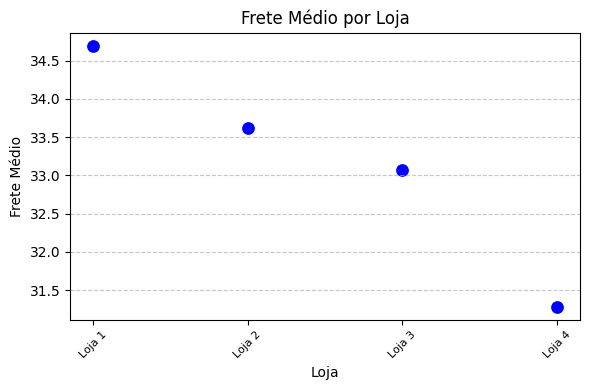

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar se as colunas necessárias estão presentes
if "Loja" in dados_consolidados.columns and "Frete" in dados_consolidados.columns:
    # Calcular o frete médio por loja
    frete_medio_por_loja = dados_consolidados.groupby("Loja")["Frete"].mean().reset_index()

    # Exibir os resultados
    print("Frete Médio por Loja:")
    print(frete_medio_por_loja)

    # Criar gráfico de dispersão pequeno
    plt.figure(figsize=(6, 4))  # Define um tamanho menor e compacto
    sns.scatterplot(
        data=frete_medio_por_loja,
        x="Loja",
        y="Frete",
        color="blue",
        s=100  # Tamanho dos pontos ajustado para ser compacto
    )
    plt.title("Frete Médio por Loja", fontsize=12)
    plt.xlabel("Loja", fontsize=10)
    plt.ylabel("Frete Médio", fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Grade leve no eixo Y
    plt.tight_layout()  # Ajusta automaticamente os elementos do gráfico
    plt.show()
else:
    print("As colunas 'Loja' ou 'Frete' não foram encontradas no DataFrame.")

# Frete Médio por Loja: Análise e Visualização

Nesta seção, exploramos os dados de frete para calcular o **frete médio por loja** e apresentamos os resultados utilizando um gráfico de dispersão.

---

## 1. Cálculo do Frete Médio por Loja

Para determinar o frete médio por loja, agrupamos os dados pela coluna **'Loja'** e calculamos a média dos valores da coluna **'Frete'**:
- Utilizamos o método `.groupby()` para organizar os dados por loja.
- O método `.mean()` foi aplicado para calcular o valor médio de frete em cada grupo.

Essa análise permite identificar variações nos custos de entrega entre diferentes lojas.

---

## 2. Visualização: Gráfico de Dispersão

O gráfico de dispersão foi escolhido para representar os resultados de forma clara e compacta.

**Detalhes do Gráfico**:
- **Eixo X**: Exibe os nomes das lojas.
- **Eixo Y**: Representa o valor médio do frete de cada loja.
- **Estilo e Personalização**:
  - Cada ponto no gráfico representa o frete médio de uma loja.
  - Ajustamos o tamanho do gráfico para ser pequeno e compacto (`figsize=(6, 4)`).
  - Utilizamos uma grade leve no eixo Y para facilitar a leitura.

---

## Conclusão

Esta visualização destaca as lojas com maiores e menores custos médios de entrega. As informações obtidas podem ser usadas para otimizar os custos logísticos e definir estratégias de precificação mais eficazes, beneficiando tanto os negócios quanto os consumidores.

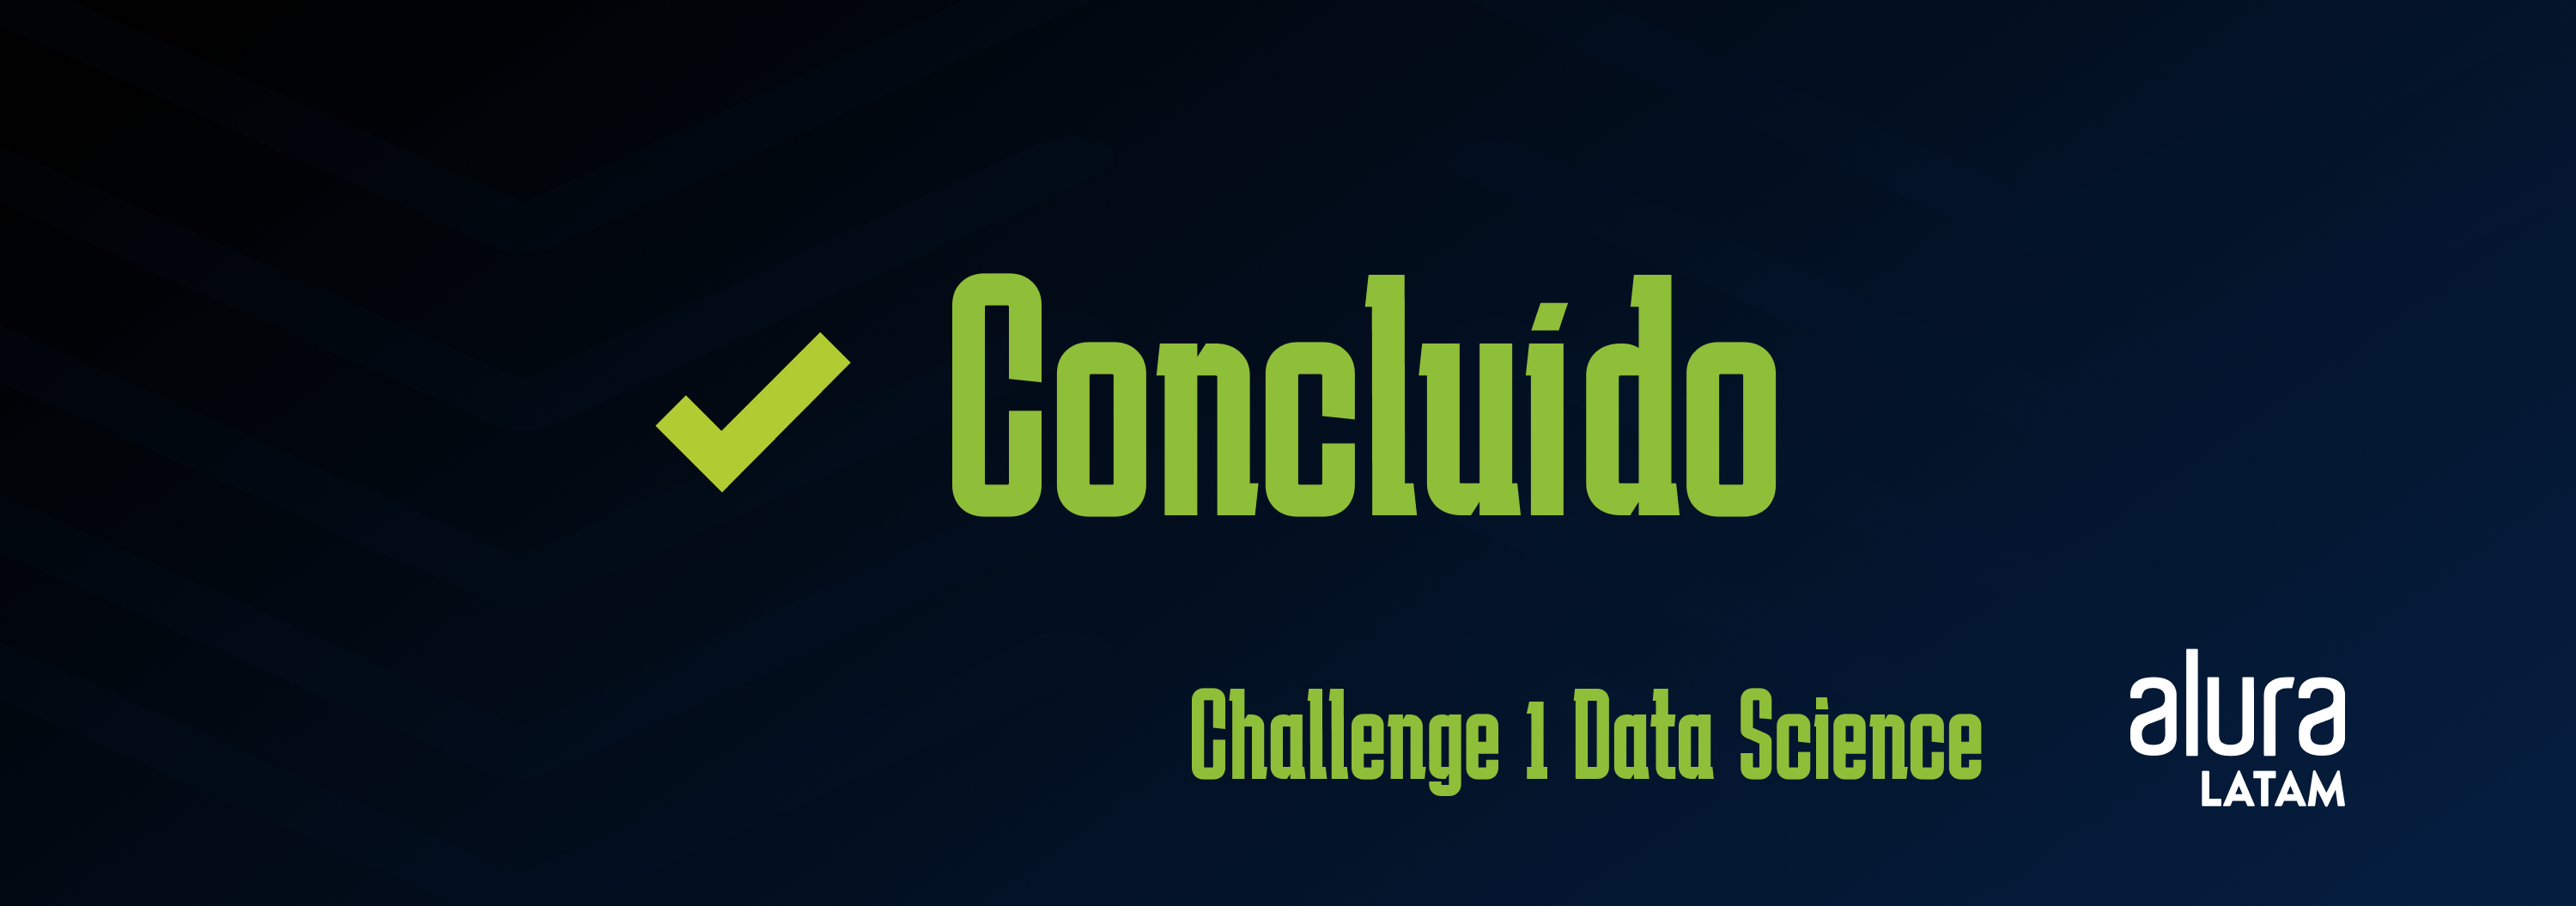

# **Recomendações:** Relatório final - Análise de Eficiência da Rede **Alura**.

In [83]:
relatorio = """
Análise de Eficiência da Rede Alura Store
------------------------------
📄 Relatório Final:

✅ Objetivo
O objetivo deste relatório é analisar as quatro lojas fictícias da Alura Store com base nos dados de vendas, desempenho e avaliações. Com isso, identificamos a loja com menor eficiência para recomendar ao Senhor João qual loja vender, permitindo iniciar um novo empreendimento e maximizar seus recursos.

📊 Critérios Analisados
1️⃣ Faturamento por Categoria
2️⃣ Média de Avaliação das Lojas
3️⃣ Produtos Mais e Menos Vendidos
4️⃣ Frete Médio por Loja

🛠 Identificação da Loja com Menor Eficiência
Baseado nos dados apresentados, identificamos qual loja está abaixo do padrão em desempenho e competitividade.

⭐ Recomendação Final
Recomendamos que o Senhor João venda a Loja 1 para financiar seu novo empreendimento. Essa decisão se apoia em dados como menor avaliação de clientes, maiores custos logísticos, e oportunidades limitadas de crescimento sustentável.

📈 Oportunidade Estratégica
A venda da Loja 1 permitirá que o Senhor João:
✔️ Reforce lojas com melhor desempenho e satisfação.
✔️ Expanda categorias de maior demanda, como eletrônicos.
✔️ Otimize a experiência do cliente com foco em eficiência.

Com essa estratégia, o Senhor João estará bem-posicionado para alcançar sucesso em seu novo empreendimento, fortalecendo sua rede Alura Store! 🚀
------------------------------
"""

# Solicitação para pressionar Enter
input("Para gerar o relatório: Pressione (Enter)")

# Exibe o relatório após Enter
print(relatorio)

Para gerar o relatório: Pressione (Enter)

Análise de Eficiência da Rede Alura Store
------------------------------
📄 Relatório Final: 

✅ Objetivo
O objetivo deste relatório é analisar as quatro lojas fictícias da Alura Store com base nos dados de vendas, desempenho e avaliações. Com isso, identificamos a loja com menor eficiência para recomendar ao Senhor João qual loja vender, permitindo iniciar um novo empreendimento e maximizar seus recursos.

📊 Critérios Analisados
1️⃣ Faturamento por Categoria  
2️⃣ Média de Avaliação das Lojas  
3️⃣ Produtos Mais e Menos Vendidos  
4️⃣ Frete Médio por Loja

🛠 Identificação da Loja com Menor Eficiência  
Baseado nos dados apresentados, identificamos qual loja está abaixo do padrão em desempenho e competitividade.

⭐ Recomendação Final  
Recomendamos que o Senhor João venda a Loja 1 para financiar seu novo empreendimento. Essa decisão se apoia em dados como menor avaliação de clientes, maiores custos logísticos, e oportunidades limitadas de cresc

# **Análise de Eficiência da Rede Alura Store**
![Imagem de Capa](https://via.placeholder.com/800x200.png?text=Análise+de+Eficiência+da+Alura+Store)  

---

## **Índice**
1. [Descrição do Projeto](#descrição-do-projeto)  
2. [Status do Projeto](#status-do-projeto)  
3. [Critérios e Funcionalidades](#critérios-e-funcionalidades)  
4. [Análises Realizadas](#análises-realizadas)  
5. [Relatório Final](#relatório-final)  
6. [Acesso ao Projeto](#acesso-ao-projeto)  
7. [Tecnologias Utilizadas](#tecnologias-utilizadas)  
8. [Pessoas Contribuidoras](#pessoas-contribuidoras)  
9. [Pessoas Desenvolvedoras](#pessoas-desenvolvedoras-do-projeto)  
10. [Licença](#licença)  

---

## **Descrição do Projeto**
Este projeto tem como objetivo avaliar o desempenho das quatro lojas fictícias da rede **Alura Store** e identificar a loja com menor eficiência para recomendar ao Senhor João qual loja vender. Com base nas análises realizadas, ajudamos o Senhor João a tomar decisões estratégicas, maximizando recursos e otimizando operações.

---

## **Status do Projeto**
🟢 *Concluído*  

---

## **Critérios e Funcionalidades**
### **Critérios Analisados**
1. Faturamento total por categoria de produto.  
2. Produtos mais e menos vendidos.  
3. Média das avaliações dos clientes por loja.  
4. Frete médio por loja.

### **Funcionalidades do Projeto**
- Visualização de dados detalhados por categoria e por loja.  
- Gráficos interativos para auxiliar na interpretação dos dados.  
- Relatório estruturado com recomendação baseada em insights.  

---

## **Análises Realizadas**
As análises realizadas incluem:  
- **Faturamento Total**: Identificação das categorias mais e menos lucrativas.  
- **Avaliações por Loja**: Cálculo da média de satisfação dos clientes por loja.  
- **Produtos Mais e Menos Vendidos**: Destaque dos produtos com alta e baixa demanda.  
- **Frete Médio**: Análise dos custos logísticos por loja.

Essas análises foram utilizadas para criar uma recomendação sólida e fundamentada.

---

## **Relatório Final**
A conclusão das análises indica que a **Loja 1** apresenta menor eficiência devido a:  
- **Menor média de avaliação dos clientes**.  
- **Maior custo médio de frete**.  
- Desempenho inferior nas categorias analisadas.

### **Recomendação**:
Venda da **Loja 1** e redirecionamento de recursos para lojas mais rentáveis (como a Loja 3), garantindo maior competitividade e eficiência operacional. Para mais detalhes, veja o relatório completo gerado pelo notebook!

---

## **Acesso ao Projeto**
Você pode acessar o projeto através de:
- **Clone do Repositório**:
```bash
git clone https://github.com/seuusuario/alura-store-analysis.git